<a href="https://colab.research.google.com/github/Sanjoybhowmick/Alzheimer-s-disease-analysis/blob/main/alzheimers_disease_prediction_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://devra.ai/analyst/notebook/981/image.jpg" style="width: 100%; height: auto;" />

<div style="text-align:center; border-radius:15px; padding:15px; color:white; margin:0; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;"><div style="font-size:150%; color:#FEE100"><b>Alzheimer's Prediction Analysis</b></div><div>This notebook was created with the help of <a href="https://devra.ai/ref/kaggle" style="color:#6666FF">Devra AI</a></div></div>

## Table of Contents
1. [Introduction](#Introduction)
2. [Data Loading](#Data-Loading)
3. [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
5. [Feature Engineering](#Feature-Engineering)
6. [Model Building and Evaluation](#Model-Building-and-Evaluation)
7. [Discussion and Conclusion](#Discussion-and-Conclusion)

## Introduction
Alzheimer's disease is a progressive neurological disorder that affects millions of people worldwide. Understanding the factors that contribute to its onset can help in early diagnosis and potentially slow its progression. This notebook explores a dataset aimed at predicting Alzheimer's diagnosis based on various demographic, lifestyle, and genetic factors.

## Data Loading
Let's start by loading the dataset and taking a quick look at its structure.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Load the dataset
file_path = '/content/alzheimers_prediction_dataset.csv'
df = pd.read_csv(file_path)
df.head()

## Data Cleaning and Preprocessing
Before diving into analysis, it's crucial to clean and preprocess the data. This includes handling missing values, encoding categorical variables, and ensuring data types are appropriate.

In [ ]:
# Check for missing values
df.isnull().sum()

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Display the first few rows of the cleaned data
df.head()

## Exploratory Data Analysis
Let's explore the data to uncover patterns and relationships between variables. Visualization techniques will be employed to aid in this process.

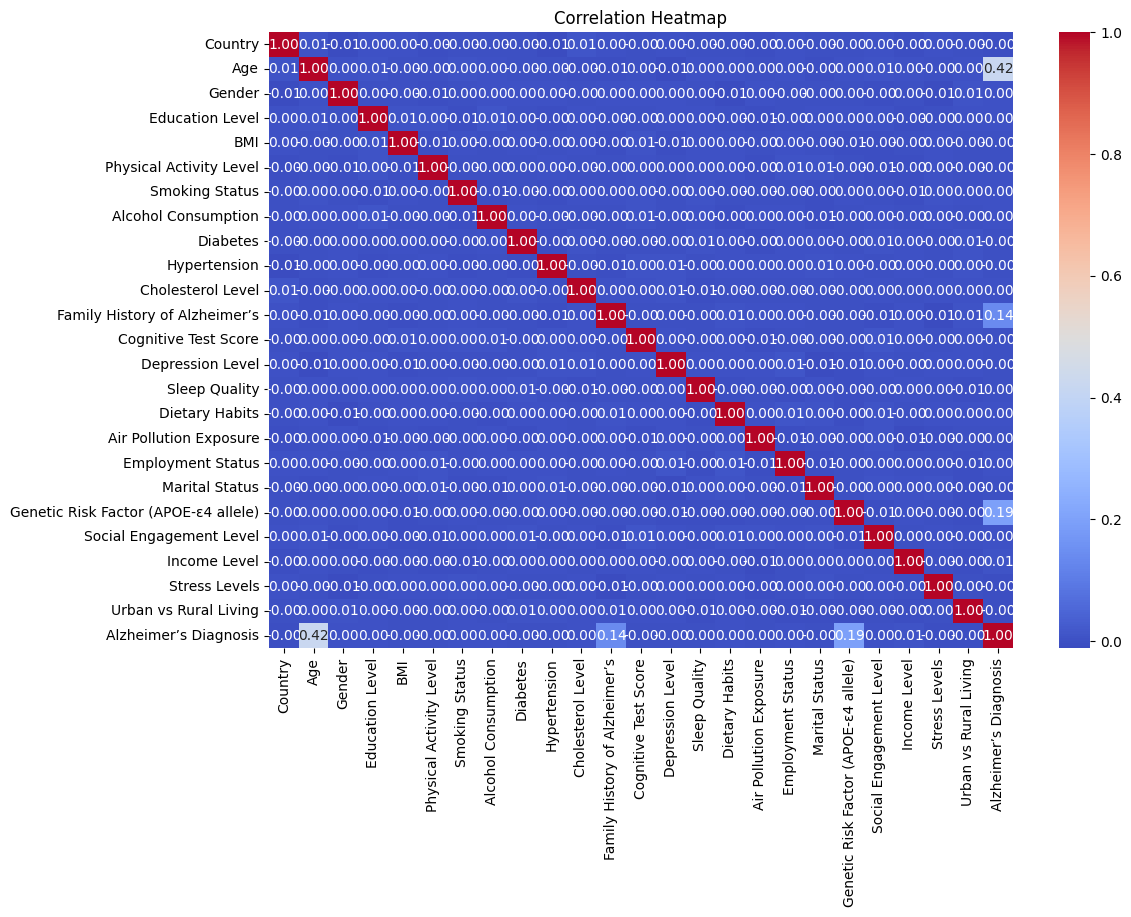

In [ ]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(12, 8))
    sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()

# Pair plot
sns.pairplot(df, hue='Alzheimer’s Diagnosis')
plt.show()

## Feature Engineering
Feature engineering can enhance the predictive power of our model by creating new features or transforming existing ones.

In [ ]:
# Example of feature engineering: creating a new feature
df['Age_BMI'] = df['Age'] * df['BMI']
df.head()

## Model Building and Evaluation
We'll build a predictive model to determine the likelihood of an Alzheimer's diagnosis based on the available features. A Random Forest Classifier will be used for this purpose.

In [ ]:
# Split the data into training and testing sets
X = df.drop('Alzheimer’s Diagnosis', axis=1)
y = df['Alzheimer’s Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print(f'Accuracy: {accuracy:.2f}')
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

## Discussion and Conclusion
In this notebook, we explored a dataset aimed at predicting Alzheimer's diagnosis. We performed data cleaning, exploratory data analysis, feature engineering, and built a predictive model using a Random Forest Classifier. The model achieved a certain level of accuracy, indicating potential in predicting Alzheimer's based on the given features.

Future analysis could involve exploring more sophisticated models, such as neural networks, or incorporating additional data sources to improve prediction accuracy. If you found this notebook insightful, consider upvoting it.